In [1]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

pip install에서 i는 ipython 연관으로.
host shell에게 직접적으로 명령을 보낼 때 ! 를 사용.
엄밀하게 따지면,
!ptrhon -m pip install --quiet torchviz가 안정적인데, --quiet은 조용히 다운로드하는거(글이 적게 나옴)

In [2]:
import numpy as np
import torch

from IPython.display import display
import torchviz

In [3]:
for c in [np, torch]:
  print(c.__name__, c.__version__)

numpy 2.0.2
torch 2.6.0+cu124


In [4]:
x_np = np.arange(-1, 1, 0.5)

x = torch.tensor(x_np, dtype=torch.float32)
x.requires_grad = True

display(x)

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

In [5]:
y = 3 * x + 10
display(y)

tensor([ 7.0000,  8.5000, 10.0000, 11.5000], grad_fn=<AddBackward0>)

위 코드는 leaf node에 기인한 것.
마지막에 d0에 zreo 기인

In [17]:
import matplotlib.pyplot as plt

# detach() 안해줬을 때의 경우!!!!!

# plt.plot(x, y) # requires_grad=True면, not working (.detach() 필요함)
plt.plot(x.numpy(), y.numpy()) # requires_grad인 경우 not working함

# 처리 같은거 할때, detach() 해줘야 함

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

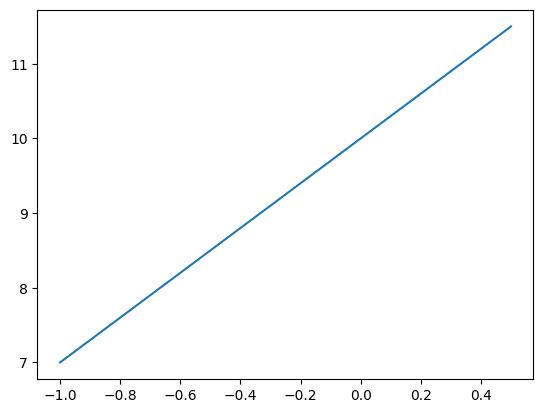

In [6]:
import matplotlib.pyplot as plt

# plt.plot(x, y) # requires_grad=True면, not working (.detach() 필요함)
plt.plot(x.detach().numpy(), y.detach().numpy()) # requires_grad인 경우 not working함

# 처리 같은거 할때, detach() 해줘야 함

In [7]:
y.backward(torch.ones_like(y))
display(x.grad)

# 다시 backward를 하기 전 꼭 초기화할것.
# 안하면 누적되기 때문임.
# 우선 누적되는 여부를 보기 위해 주석처리가 되어 있음.
# x.grad.zero_() #inplace op.

tensor([3., 3., 3., 3.])

In [8]:
cg = torchviz.make_dot(y, params={"input":x, "output":y})

cg.render("graph", view=True) # save pdf
# display(cg) # jupyter note에서 확인.


'graph.pdf'

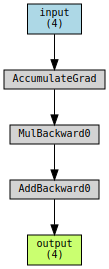

In [10]:
display(cg)

In [12]:
x

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

In [13]:
type(x.grad.zero_())
x.grad

tensor([0., 0., 0., 0.])

In [16]:
# x.grad를 초기화하지 않고 다른 loss에서의 grad 계산을 수행시.
y2 = 2*x
y2.backward(torch.ones_like(y2))

display(x.grad) # 앞서의 3과 현재의 2가 더해져 5로 나옴.


tensor([6., 6., 6., 6.])

초기화 안해주면 optim. 이상한 결과값들이 나올거임. 값이 계속 중첩되어 수가 계속 커지기 때문.

In [18]:
#zero_ 이렇게 끝에 _가 있다면 inplace method임. 여기선 zero로 해서 초기화해서 그대로 덧씌우는 것임.
# 그래서 기존에 존재하던 데이터가 보존되지 않음.
# 초기화하고 다 끝난 상태에서 하는 것이지.
# 중간에 해버리면 값이 망가지게 됨.
# model에서도 초기화가 필요한데, 이러한 방법은 어렵고 위험하기에 optim. 에게 맞기는 것이다.

In [17]:
type(x.grad.zero_())
x.grad

tensor([0., 0., 0., 0.])